<a href="https://colab.research.google.com/github/MohamedMohy01/feature-extraction-and-matching-assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab: Feature extraction and matching assignment
*   Yahia Ali Othman
*   ID: 120210302


*   Mohamed Mohy Akl
*   ID: 120210268





Saving query.jpg to query.jpg
Saving target.jpg to target.jpg
Uploaded files: ['query.jpg', 'target.jpg']


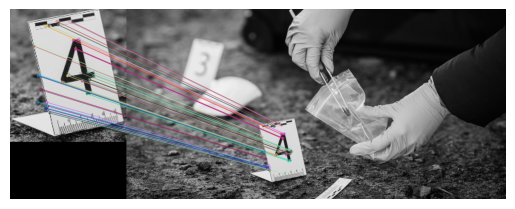

In [1]:

from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload files
uploaded = files.upload()
print("Uploaded files:", list(uploaded.keys()))  # Verify filenames

# Configuration parameters
MAX_FEATURES = 1000
TOP_MATCHES = 50

# Load input images in grayscale mode
template = cv2.imread('query.jpg', cv2.IMREAD_GRAYSCALE)  # Search template
scene = cv2.imread('target.jpg', cv2.IMREAD_GRAYSCALE)     # Main image

# Initialize feature detector with custom parameters
feature_extractor = cv2.ORB_create(
    nfeatures=MAX_FEATURES,
    scaleFactor=1.2,
    edgeThreshold=15
)

# Detect key features and compute descriptors for both images
template_kp, template_desc = feature_extractor.detectAndCompute(template, None)
scene_kp, scene_desc = feature_extractor.detectAndCompute(scene, None)

# Configure matching algorithm with Hamming distance metric
matcher = cv2.BFMatcher(
    normType=cv2.NORM_HAMMING,
    crossCheck=True
)

# Find corresponding points between images
initial_matches = matcher.match(template_desc, scene_desc)

# Sort matches by quality and select best candidates
sorted_matches = sorted(initial_matches, key=lambda m: m.distance)
best_matches = sorted_matches[:TOP_MATCHES]

# Generate visualization of matched features
result_visualization = cv2.drawMatches(
    template, template_kp,
    scene, scene_kp,
    best_matches, None,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
)

# Configure and save visualization plot
plt.figure(figsize=(12, 8))
plt.imshow(result_visualization)
plt.title('Feature Correspondence Visualization', fontsize=14)
plt.axis('off')
plt.close()

# Display results
plt.imshow(result_visualization)
plt.axis('off')
plt.show()